# INNOMATIC RESEARCH LAB -- FINAL PROJECT

# PROJECT NAME: Plant Disease classification

# TEAM MEMBERS:

__1. Kashetti Prashanth__

__2. Manuj Kumar Joshi__

__3.Priyanka Nandibhatla__

__4.Soujanya Vattikolla__

__5.Pooja Roy Choudhary__

# PROJECT BASED ON COMPUTER VISION

![Screenshot%20%2891%29.png](attachment:Screenshot%20%2891%29.png)

# COMPUTER VISION

__“Computer Vision” - the ultimate goal is to use computers to emulate human vision, including learning and being able to make inferences and take actions based on visual inputs. It is concerned with the automatic extraction, analysis and understanding of useful information from a single image or a sequence of images.__

__A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.__

# Input: Images

__An image is nothing but a matrix of pixel values we flatten the image and feed it to a Multi-Level Perceptron for classification purposes.__

# Output: Knowledge of the scene (recognize objects, people, activity happening there, distance of the object from camera and each other, …)

# INTRODUCTION:

__Deep learning models have shown higher performance than machine learning in many fields. Yet, I found it difficult to visualize and understand what is happening behind the layers and activations. It becomes quicly a problem when these models are taken away from the benchmark datasets and need to answer a business case. In my work as a data scientist, I am being challenged with explainability, transparency, and reliability. And even if I have many data points, I often prefer a statistical model to deep learning. This work is a way of challenging my perspective on deep learning and get out of my comfort zone with computer vision.__

# MODEL ARCHITECTURE

# Vgg -- 16

![Screenshot%20%28230%29.png](attachment:Screenshot%20%28230%29.png)

# Introduction on VGGNet

__The full name of VGG is the Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification, from VGG16 to VGG19. he original purpose of VGG's research on the depth of convolutional networks is to understand how the depth of convolutional networks affects the accuracy and accuracy of large-scale image classification and recognition.  It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.__

# IMPORTING LIBRARIES

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv2
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

# Loading The Data

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:48<00:00, 103MB/s] 
100% 2.70G/2.70G [00:48<00:00, 59.6MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

# READING THE DATA

In [ ]:
train_path= '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path='/content/test/test'

In [ ]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = train_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [ ]:
def valid_loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = valid_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [ ]:
paths, classes = loading_images(train_path)
valid_paths,valid_classes=valid_loading_images(valid_path)

In [ ]:
def labeling_images(unique_paths, unique_classes):
    img_paths =[]
    labels = []
    for path, label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "/" + i
            img_paths.append(img_dir_list)
            labels.append(label)
    return(img_paths, labels)
    

In [ ]:
img_paths , labels = labeling_images(paths, classes)
valid_img_paths,valid_lables=labeling_images(valid_paths, valid_classes)

In [ ]:
print(img_paths.__len__())
print(labels.__len__())

70295
70295


In [ ]:
print(valid_img_paths.__len__())
print(valid_lables.__len__())

17572
17572


In [ ]:
train_dataset = list(zip(img_paths, labels))
valid_dataset= list(zip(valid_img_paths, valid_lables))

In [ ]:
train_dataset_df = pd.DataFrame(train_dataset, columns = ['Image_Paths', 'Labels'])
valid_dataset_df = pd.DataFrame(valid_dataset, columns = ['Image_Paths', 'Labels'])

In [ ]:
train_dataset_df.head()

Image_Paths              Labels
0  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
1  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
2  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
3  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
4  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab

In [ ]:
valid_dataset_df.head()

Image_Paths              Labels
0  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
1  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
2  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
3  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab
4  /content/New Plant Diseases Dataset(Augmented)...  Apple___Apple_scab

In [ ]:
train_dataset_df[['plant','diseases']]=train_dataset_df['Labels'].str.split('___',expand=True)

In [ ]:
train_dataset_df

Image_Paths  ...    diseases
0      /content/New Plant Diseases Dataset(Augmented)...  ...  Apple_scab
1      /content/New Plant Diseases Dataset(Augmented)...  ...  Apple_scab
2      /content/New Plant Diseases Dataset(Augmented)...  ...  Apple_scab
3      /content/New Plant Diseases Dataset(Augmented)...  ...  Apple_scab
4      /content/New Plant Diseases Dataset(Augmented)...  ...  Apple_scab
...                                                  ...  ...         ...
70290  /content/New Plant Diseases Dataset(Augmented)...  ...     healthy
70291  /content/New Plant Diseases Dataset(Augmented)...  ...     healthy
70292  /content/New Plant Diseases Dataset(Augmented)...  ...     healthy
70293  /content/New Plant Diseases Dataset(Augmented)...  ...     healthy
70294  /content/New Plant Diseases Dataset(Augmented)...  ...     healthy

[70295 rows x 4 columns]

In [ ]:
class_names=train_dataset_df['Labels'].unique()


In [ ]:
print(valid_dataset_df.shape,train_dataset_df.shape)

(17572, 2) (70295, 4)


# Exploratory Data Analysis

## The goal here is to get familiar with our data with visuals and statistics.

## How does it look like?

# Number of images for the particular plant.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

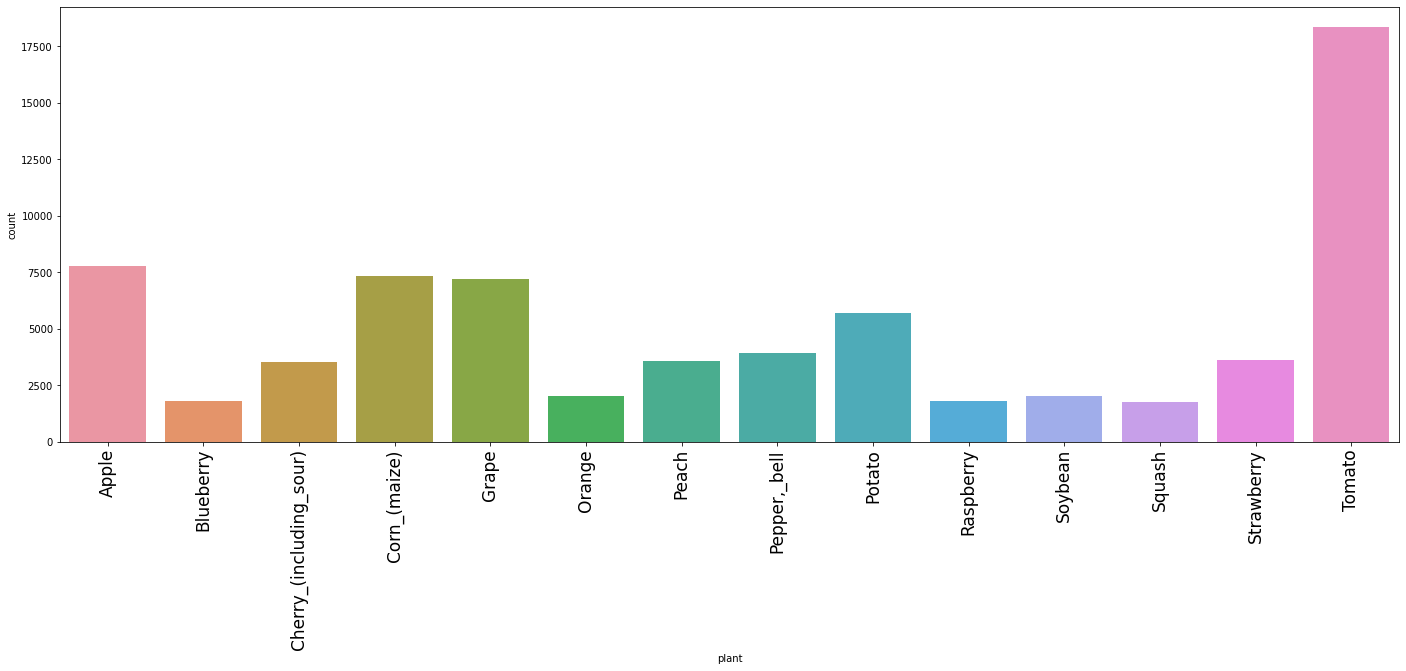

In [ ]:
import seaborn as sns
plt.figure(figsize=(24,8))
sns.countplot(train_dataset_df['plant'])
plt.xticks(rotation=90,fontsize=17)

# Number of diseases present in that plant including healthy one

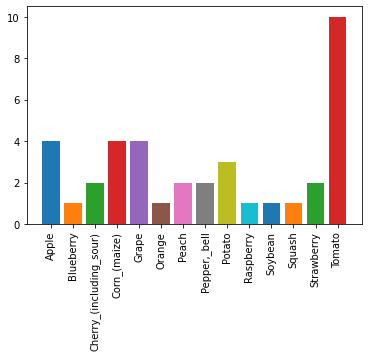

In [ ]:
for i in train_dataset_df['plant'].unique():
  plt.bar(i,train_dataset_df[train_dataset_df['plant']== i]['diseases'].nunique())
  plt.xticks(rotation=90)

# Distribution Of number of images per class:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

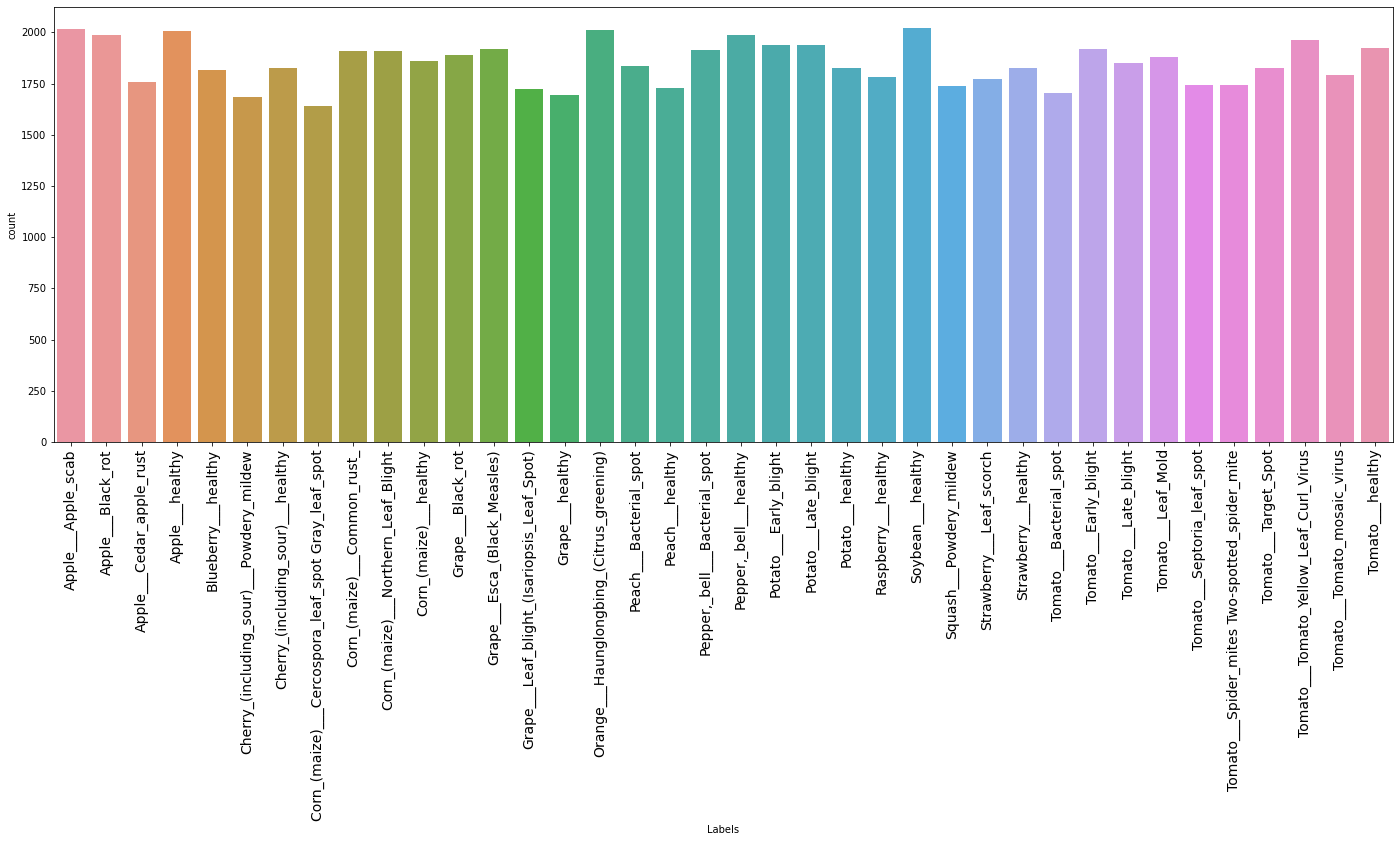

In [ ]:
import seaborn as sns
plt.figure(figsize=(24,8))
sns.countplot(train_dataset_df['Labels'])
plt.xticks(rotation=90,fontsize=14)

# VISUALIZATIONS

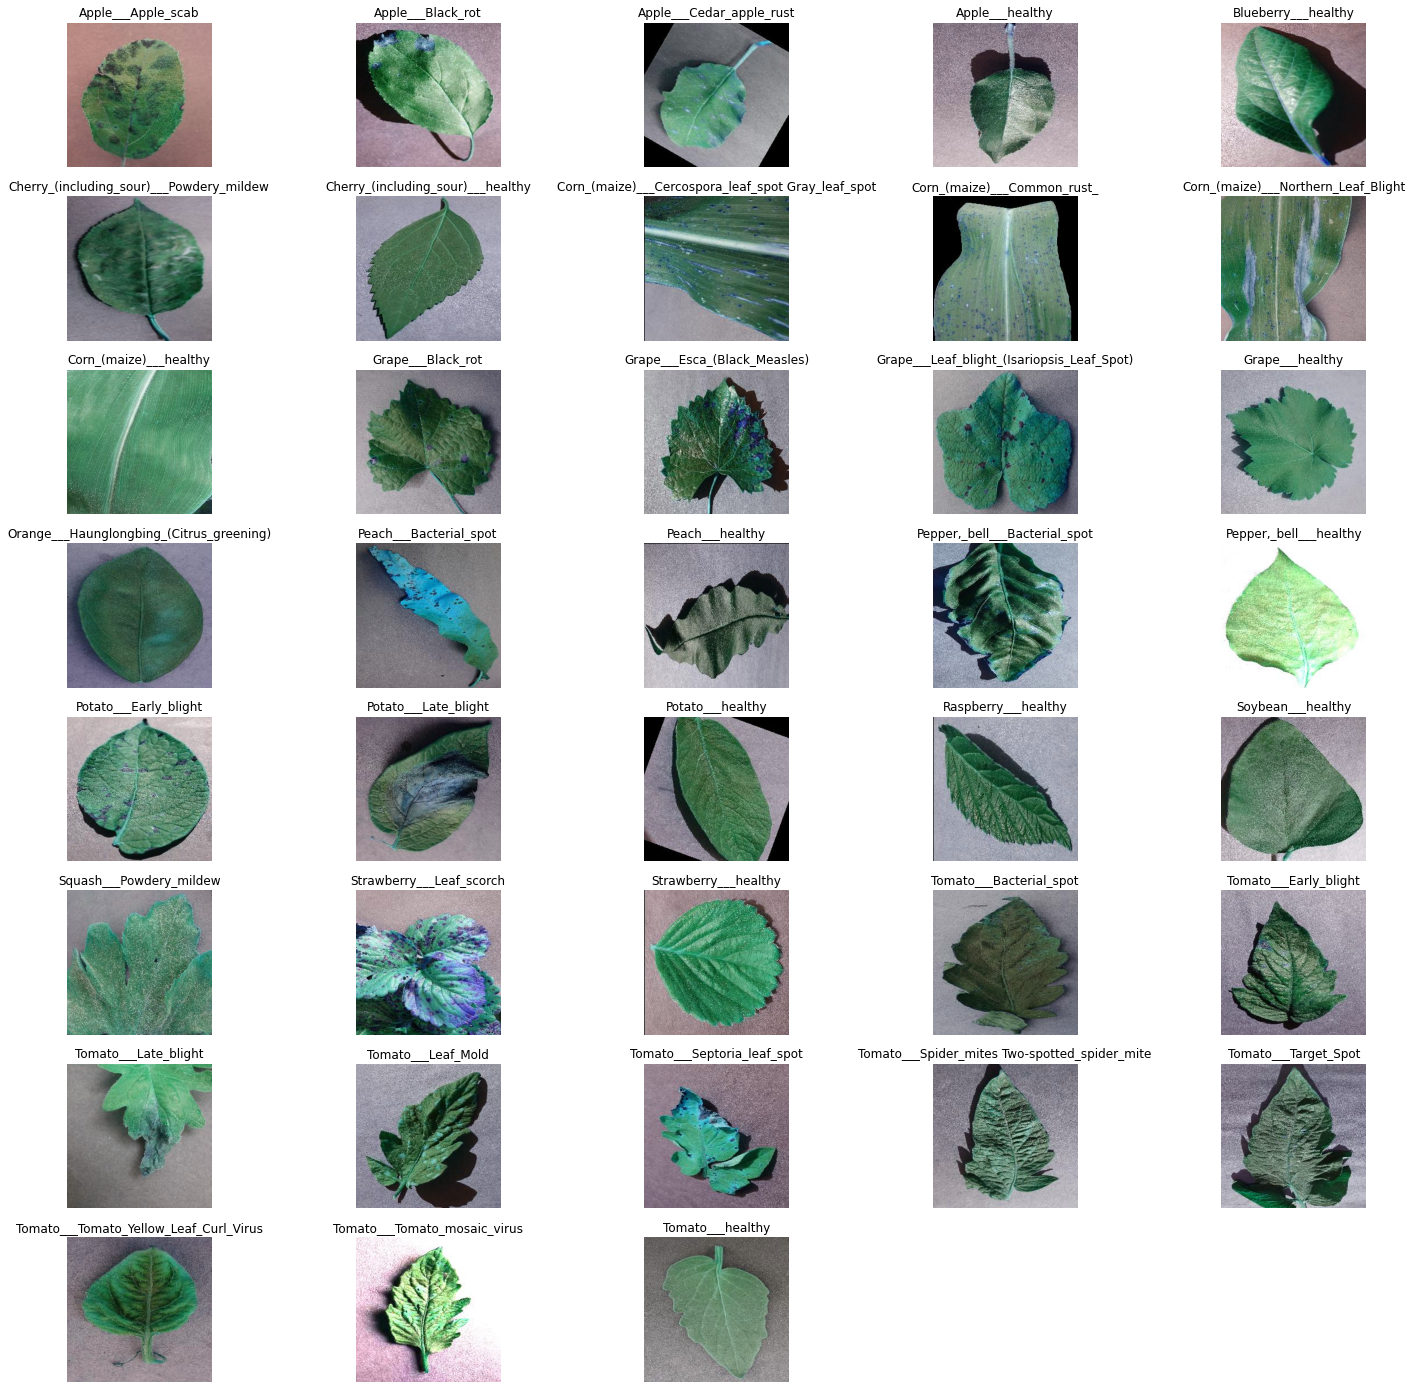

In [ ]:
plt.figure(figsize=(25,25))
for i,classes in enumerate(train_dataset_df['Labels'].unique()):
  plt.subplot(8,5,i+1).set_title(classes)
  plt.imshow(cv2.imread(train_dataset_df.loc[train_dataset_df['Labels']== classes].reset_index().Image_Paths[0]))
  plt.axis('off')
plt.show()
  

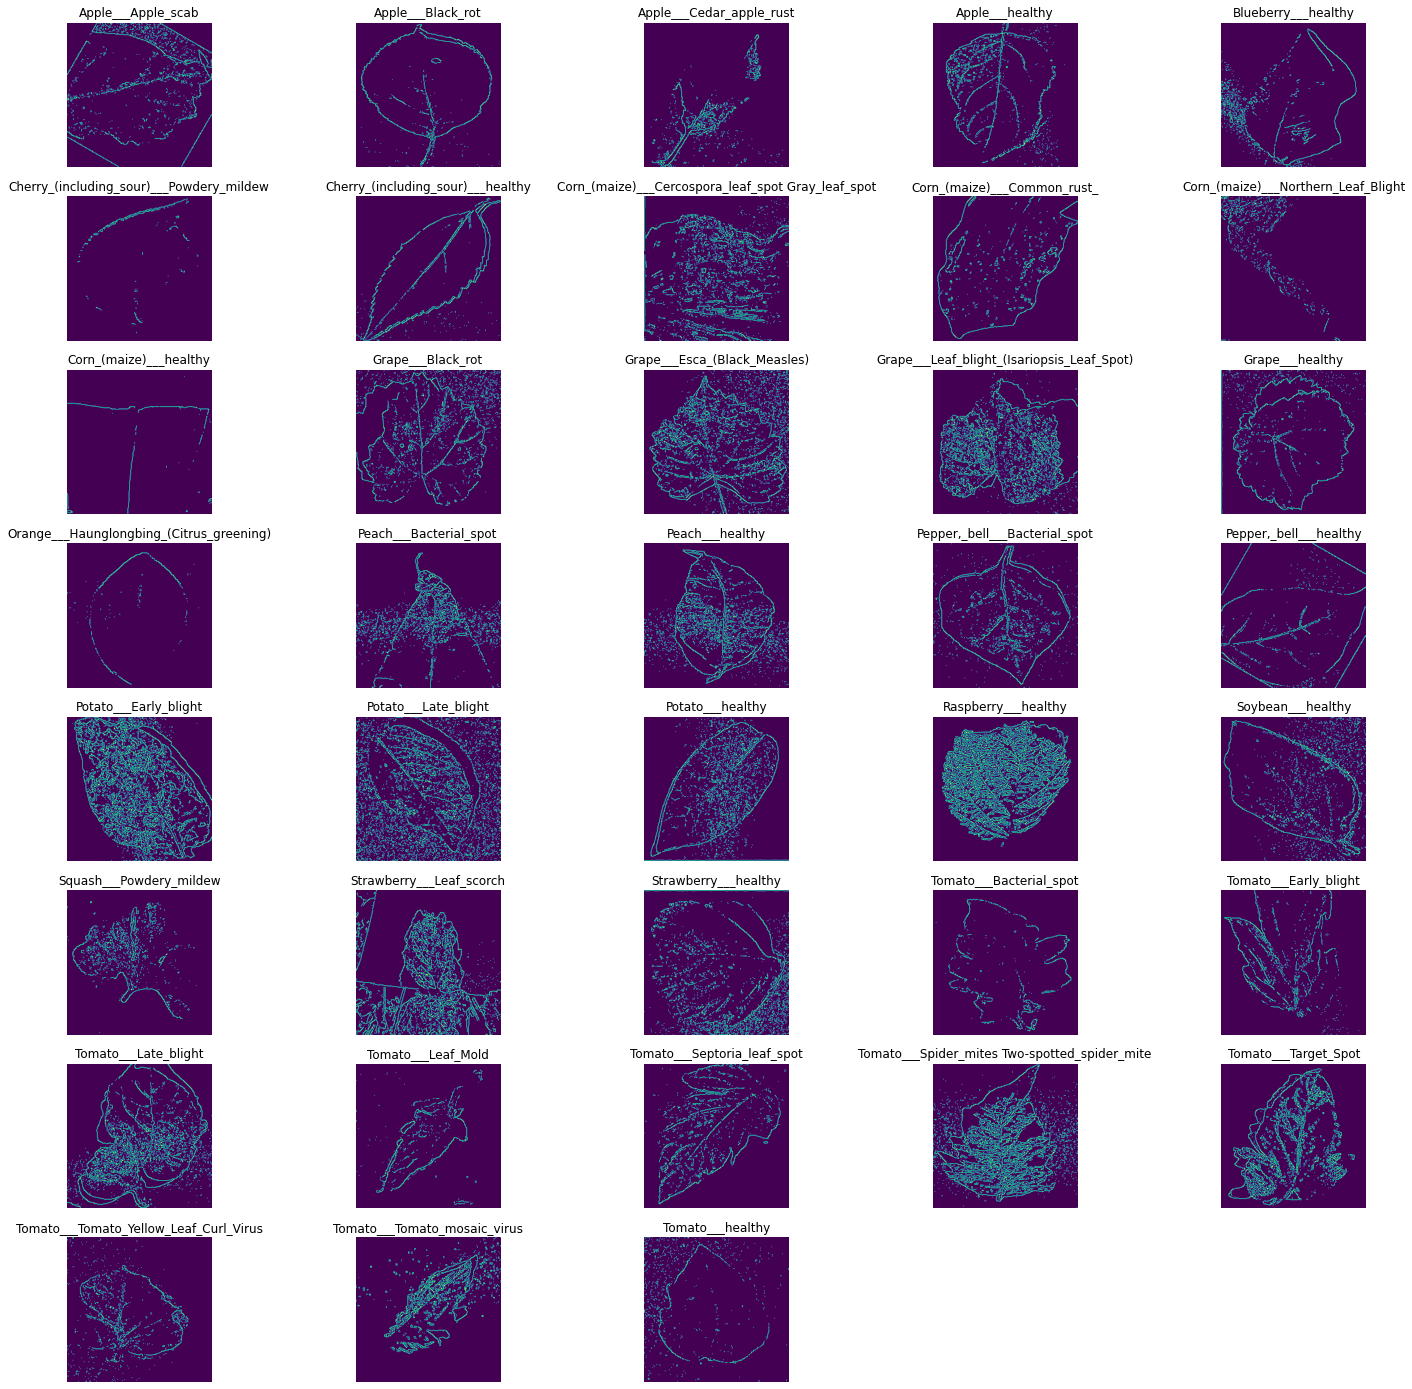

In [ ]:
plt.figure(figsize=(25,25))
for i,classes in enumerate(train_dataset_df['Labels'].unique()):
  plt.subplot(8,5,i+1).set_title(classes)
  img=cv2.imread(train_dataset_df.loc[train_dataset_df['Labels']== classes].reset_index().Image_Paths[6])
  gra = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #gaussian_blur = cv2.GaussianBlur(img, (7,7), 16)
  canny_edge = cv2.Canny(gra, 200, 200)
  #erosion = cv2.erode(canny_edge, (3,3), iterations=1)
  #dilation = cv2.dilate(erosion, (3,3), iterations=3)
  plt.imshow(canny_edge)
  plt.axis('off')
plt.show()

# IMAGE PREPROCESSING

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_dataset_df, x_col='Image_Paths', y_col='Labels', batch_szie=16, 
                                               target_size = (224, 224),class_mode = 'categorical', shuffle=True)

Found 70295 validated image filenames belonging to 38 classes.


In [ ]:
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid_dataset_df, x_col='Image_Paths', y_col='Labels', batch_szie=16, target_size = (224, 224),
                                              class_mode = 'categorical', shuffle=True)

Found 17572 validated image filenames belonging to 38 classes.


# Model Building

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top =False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
network =Sequential()
network.add(base_model)

network.add(Flatten())
network.add(Dense(38, activation='softmax'))


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 38)                953382    
                                                                 
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
 hist=network.fit_generator(
  train_gen,
  validation_data=valid_gen,
  epochs=10,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
2197/2197 [==============================] - 385s 168ms/step - loss: 0.5254 - accuracy: 0.8586 - val_loss: 0.3324 - val_accuracy: 0.9122
Epoch 2/10
2197/2197 [==============================] - 384s 175ms/step - loss: 0.2367 - accuracy: 0.9372 - val_loss: 0.2756 - val_accuracy: 0.9325
Epoch 3/10
2197/2197 [==============================] - 384s 175ms/step - loss: 0.1768 - accuracy: 0.9547 - val_loss: 0.5479 - val_accuracy: 0.9132
Epoch 4/10
2197/2197 [==============================] - 383s 174ms/step - loss: 0.1510 - accuracy: 0.9643 - val_loss: 0.4697 - val_accuracy: 0.9177
Epoch 5/10
2197/2197 [==============================] - 383s 174ms/step - loss: 0.1293 - accuracy: 0.9698 - val_loss: 0.3234 - val_accuracy: 0.9460
Epoch 6/10
2197/2197 [==============================] - 384s 175ms/step - loss: 0.1052 - accuracy: 0.9754 - val_loss: 0.3460 - val_accuracy: 0.9449
Epoch 7/10
2197/2197 [==============================] - 384s 175ms/step - loss: 0.0942 - accuracy: 0.9790 - val_

In [ ]:
loss_fn, accuracy = network.evaluate(valid_gen)

550/550 [==============================] - 68s 124ms/step - loss: 0.3600 - accuracy: 0.9522


# ACCURACY and LOSS PLOT

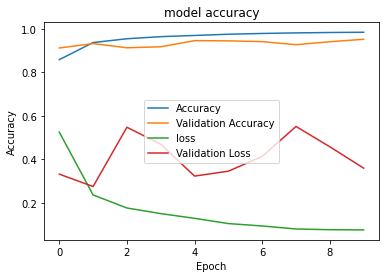

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
network.save('/content/model/vgg16.h5')

# **Prediction** 

In [ ]:
test_image_data = []
test_image_filenames = []

for img_name in os.listdir('/content/test/test'):
    img = load_img(os.path.join('/content/test/test/', img_name), target_size = (224, 224))
    test_image_data.append(img_to_array(img, dtype = 'uint8'))
    test_image_filenames.append(img_name)
    print(img_name)
    
test_image_data = np.array(test_image_data)/255
print(f'\nTotal testing images: {len(test_image_data)}')

TomatoEarlyBlight4.JPG
PotatoEarlyBlight1.JPG
TomatoEarlyBlight5.JPG
TomatoHealthy2.JPG
CornCommonRust1.JPG
AppleScab1.JPG
TomatoEarlyBlight2.JPG
PotatoHealthy2.JPG
AppleCedarRust4.JPG
AppleCedarRust3.JPG
AppleScab3.JPG
PotatoEarlyBlight4.JPG
PotatoEarlyBlight3.JPG
TomatoEarlyBlight1.JPG
TomatoEarlyBlight3.JPG
TomatoYellowCurlVirus6.JPG
TomatoEarlyBlight6.JPG
TomatoHealthy3.JPG
TomatoYellowCurlVirus3.JPG
TomatoYellowCurlVirus5.JPG
CornCommonRust2.JPG
TomatoHealthy1.JPG
TomatoYellowCurlVirus2.JPG
PotatoEarlyBlight5.JPG
AppleScab2.JPG
PotatoHealthy1.JPG
PotatoEarlyBlight2.JPG
AppleCedarRust1.JPG
AppleCedarRust2.JPG
TomatoYellowCurlVirus4.JPG
TomatoHealthy4.JPG
CornCommonRust3.JPG
TomatoYellowCurlVirus1.JPG

Total testing images: 33


In [ ]:
test_pred = np.argmax(network.predict(test_image_data), axis = 1)
test_pred

array([29, 20, 29, 37,  8,  0, 29, 22,  2,  2, 25, 20, 21, 29, 29, 35, 29,
       37, 35, 35,  8, 37, 35, 20,  0, 22, 20,  2,  2, 35, 37,  8, 35])

In [ ]:
test_pred_classes = [class_names[i] for i in test_pred]

pd.DataFrame({
    "Filename": test_image_filenames,
    "Predicted classes": test_pred_classes
    })

Filename                       Predicted classes
0       TomatoEarlyBlight4.JPG                   Tomato___Early_blight
1       PotatoEarlyBlight1.JPG                   Potato___Early_blight
2       TomatoEarlyBlight5.JPG                   Tomato___Early_blight
3           TomatoHealthy2.JPG                        Tomato___healthy
4          CornCommonRust1.JPG             Corn_(maize)___Common_rust_
5               AppleScab1.JPG                      Apple___Apple_scab
6       TomatoEarlyBlight2.JPG                   Tomato___Early_blight
7           PotatoHealthy2.JPG                        Potato___healthy
8          AppleCedarRust4.JPG                Apple___Cedar_apple_rust
9          AppleCedarRust3.JPG                Apple___Cedar_apple_rust
10              AppleScab3.JPG                 Squash___Powdery_mildew
11      PotatoEarlyBlight4.JPG                   Potato___Early_blight
12      PotatoEarlyBlight3.JPG                    Potato___Late_blight
13      TomatoEarlyBlight1.JPG                   Tomato___Early_blight
14      TomatoEarlyBlight3.JPG                   Tomato___Early_blight
15  TomatoYellowCurlVirus6.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
16      TomatoEarlyBlight6.JPG                   Tomato___Early_blight
17          TomatoHealthy3.JPG                        Tomato___healthy
18  TomatoYellowCurlVirus3.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
19  TomatoYellowCurlVirus5.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
20         CornCommonRust2.JPG             Corn_(maize)___Common_rust_
21          TomatoHealthy1.JPG                        Tomato___healthy
22  TomatoYellowCurlVirus2.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
23      PotatoEarlyBlight5.JPG                   Potato___Early_blight
24              AppleScab2.JPG                      Apple___Apple_scab
25          PotatoHealthy1.JPG                        Potato___healthy
26      PotatoEarlyBlight2.JPG                   Potato___Early_blight
27         AppleCedarRust1.JPG                Apple___Cedar_apple_rust
28         AppleCedarRust2.JPG                Apple___Cedar_apple_rust
29  TomatoYellowCurlVirus4.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
30          TomatoHealthy4.JPG                        Tomato___healthy
31         CornCommonRust3.JPG             Corn_(maize)___Common_rust_
32  TomatoYellowCurlVirus1.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus

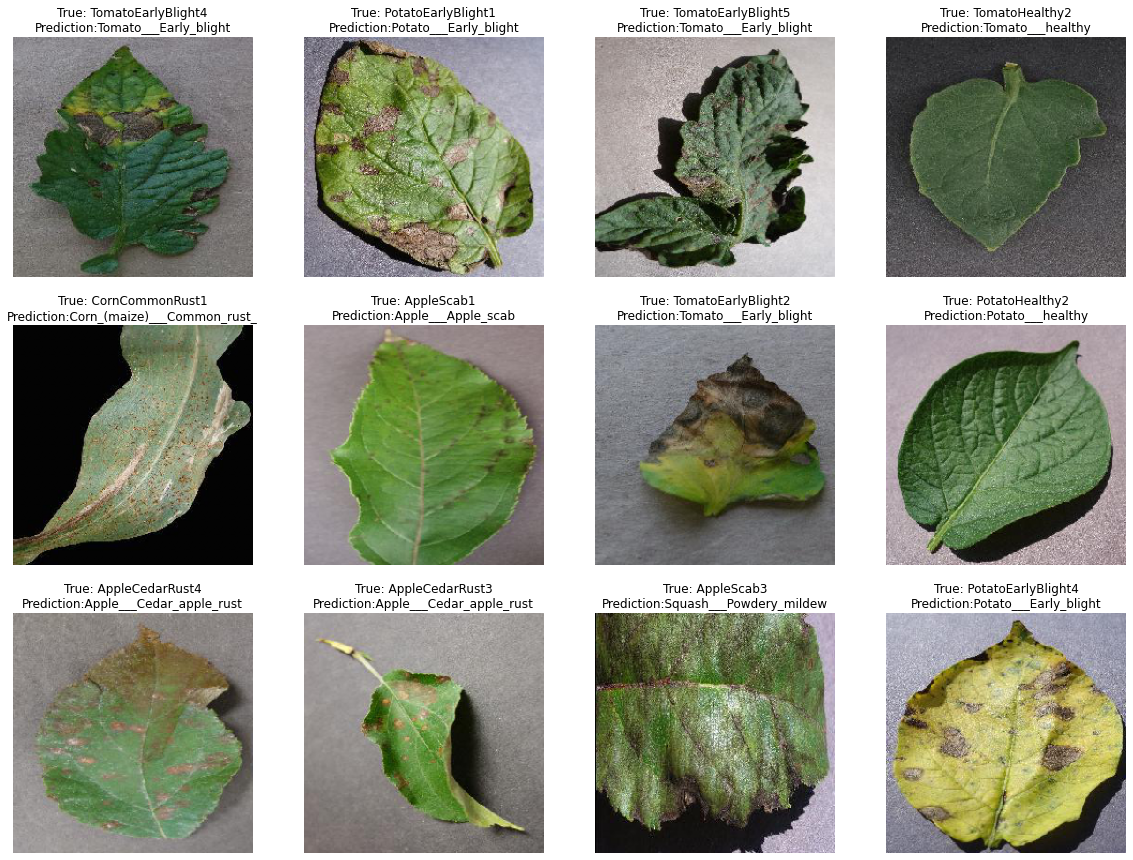

In [ ]:
plt.subplots(nrows = 3, ncols = 4, figsize = (20, 15))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.imshow(test_image_data[i])
    plt.title(f"True: {test_image_filenames[i][:-4]}\nPrediction:{test_pred_classes[i]}")

plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/model/vgg16.h5')

In [ ]:
test_pred = np.argmax(model.predict(test_image_data), axis = 1)
test_pred

array([29, 20, 29, 37,  8,  0, 29, 22,  2,  2, 25, 20, 21, 29, 29, 35, 29,
       37, 35, 35,  8, 37, 35, 20,  0, 22, 20,  2,  2, 35, 37,  8, 35])

# **END**